# NSEI :National Stock Exchange of India

# STEP #1: IMPORTING DATA

In [72]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import random
import seaborn as sns
from fbprophet import Prophet
import warnings
warnings.filterwarnings('ignore')

# STEP #2: EXPLORING THE DATASET

In [73]:
nse = pd.read_csv('/content/drive/My Drive/Colab Notebooks/3C Capitals/#1 TASK/NSEI.csv', error_bad_lines=False)
nse

,Date,Close
0,7/16/2010,5393.899902
1,7/19/2010,5386.450195
2,7/20/2010,5368.000000
3,7/21/2010,5399.350098
4,7/22/2010,5441.950195
...,...,...
2463,7/9/2020,10813.450200
2464,7/10/2020,10768.049810
2465,7/13/2020,10802.700200
2466,7/14/2020,10607.349610


In [74]:
nse.dropna(inplace = True)

In [75]:
nse.isna().sum()

Date     0
Close    0
dtype: int64

In [76]:
nse.index = pd.DatetimeIndex(nse['Date'])
nse.head()

,Date,Close
Date,,
2010-07-16,7/16/2010,5393.899902
2010-07-19,7/19/2010,5386.450195
2010-07-20,7/20/2010,5368.000000
2010-07-21,7/21/2010,5399.350098
2010-07-22,7/22/2010,5441.950195


In [77]:
del nse['Date']
nse.head()

,Close
Date,
2010-07-16,5393.899902
2010-07-19,5386.450195
2010-07-20,5368.000000
2010-07-21,5399.350098
2010-07-22,5441.950195


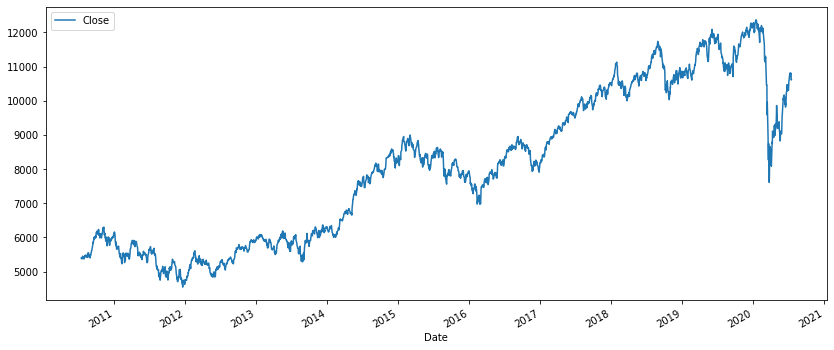

In [78]:
nse.plot(figsize = (14,6))     # ORIGNAL DATA

### Resample is a Convenience method for frequency conversion and resampling of time series.

Text(0, 0.5, 'Close')

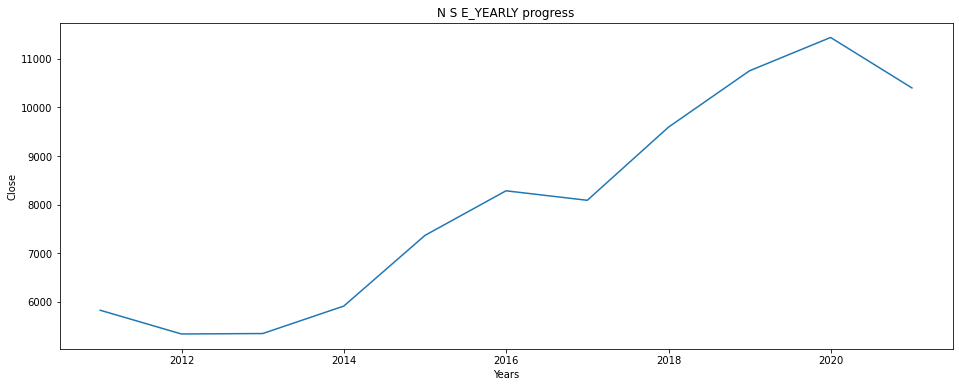

In [79]:
# Yearly
plt.figure(figsize=(16,6))
plt.plot(nse.resample('Y').mean())
plt.title('N S E_YEARLY progress')
plt.xlabel('Years')
plt.ylabel('Close')

Text(0, 0.5, 'Close')

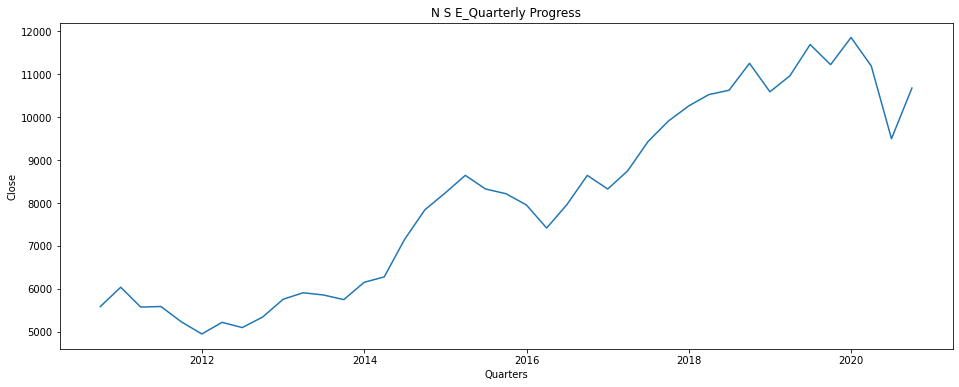

In [80]:
# Quaterly
plt.figure(figsize=(16,6))
plt.plot(nse.resample('Q').mean())
plt.title('N S E_Quarterly Progress')
plt.xlabel('Quarters')
plt.ylabel('Close')

Text(0, 0.5, 'Close')

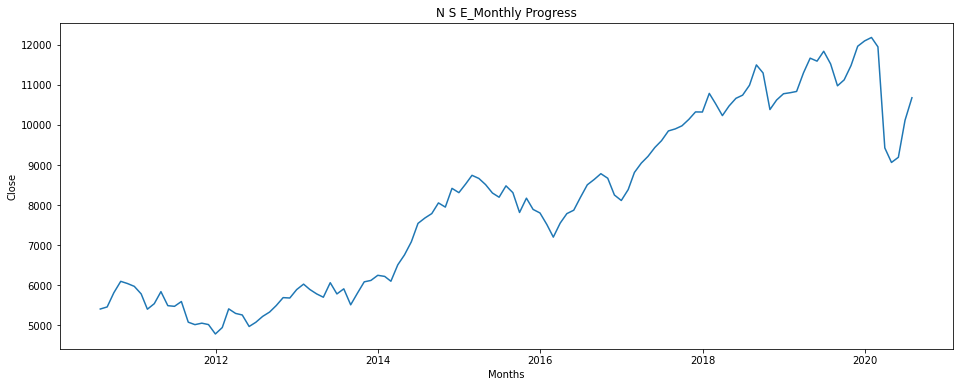

In [81]:
# Resample is a Convenience method for frequency conversion and resampling of time series.
plt.figure(figsize=(16,6))
plt.plot(nse.resample('M').mean())
plt.title('N S E_Monthly Progress')
plt.xlabel('Months')
plt.ylabel('Close')

Text(0, 0.5, 'Close')

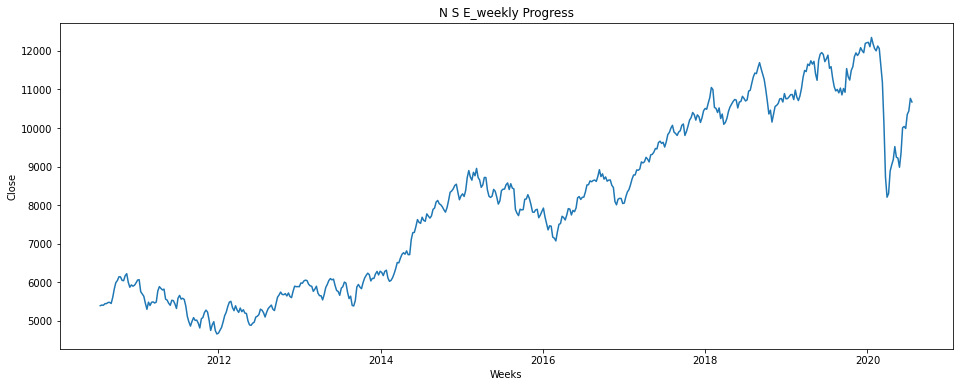

In [82]:
plt.figure(figsize=(16,6))
plt.plot(nse.resample('W').mean())
plt.title('N S E_weekly Progress')
plt.xlabel('Weeks')
plt.ylabel('Close')

Text(0, 0.5, 'Close')

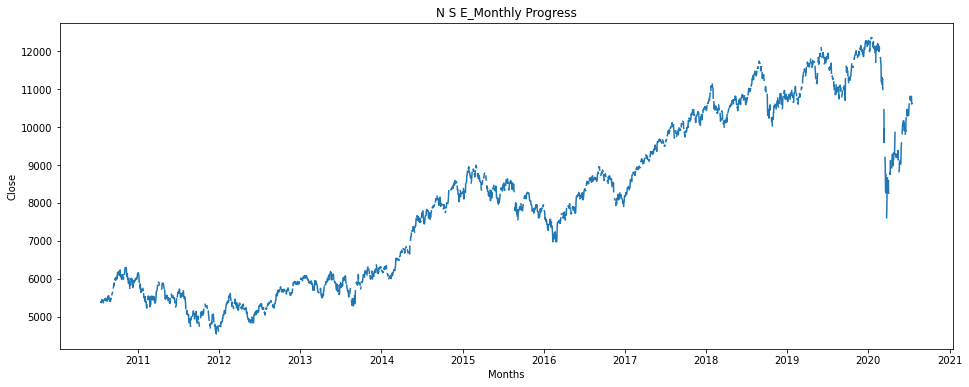

In [83]:
plt.figure(figsize=(16,6))
plt.plot(nse.resample('D').mean())
plt.title('N S E_Monthly Progress')
plt.xlabel('Months')
plt.ylabel('Close')

# STEP #3: PREPARING THE DATA¶

In [84]:
nse

,Close
Date,
2010-07-16,5393.899902
2010-07-19,5386.450195
2010-07-20,5368.000000
2010-07-21,5399.350098
2010-07-22,5441.950195
...,...
2020-07-09,10813.450200
2020-07-10,10768.049810
2020-07-13,10802.700200


In [86]:
nse_Prophet = nse.resample('D').mean().reset_index()

nse_Prophet.index = pd.DatetimeIndex(nse_Prophet['Date'])

nse_Prophet

,Date,Close
Date,,
2010-07-16,2010-07-16,5393.899902
2010-07-17,2010-07-17,NaN
2010-07-18,2010-07-18,NaN
2010-07-19,2010-07-19,5386.450195
2010-07-20,2010-07-20,5368.000000
...,...,...
2020-07-11,2020-07-11,NaN
2020-07-12,2020-07-12,NaN
2020-07-13,2020-07-13,10802.700200


In [87]:
nse_Prophet.isna().sum()

Date        0
Close    1208
dtype: int64

In [133]:
nse_rolling_W2 = nse.rolling(window=1).mean().reset_index()
nse_rolling_W2

,Date,Close
0,2010-07-16,5393.899902
1,2010-07-19,5386.450195
2,2010-07-20,5368.000000
3,2010-07-21,5399.350098
4,2010-07-22,5441.950195
...,...,...
2440,2020-07-09,10813.450200
2441,2020-07-10,10768.049810
2442,2020-07-13,10802.700200
2443,2020-07-14,10607.349610


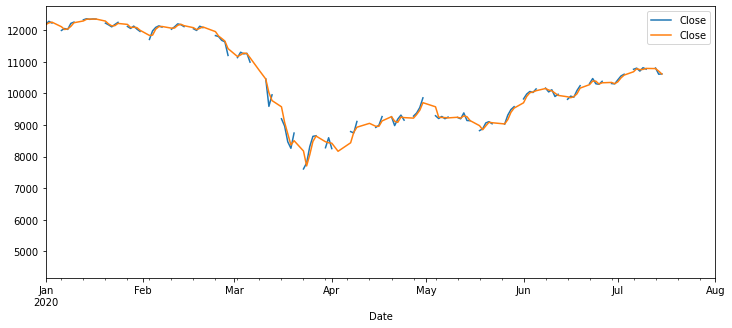

In [17]:
nse_Prophet['Close'].plot(figsize=(12,5),legend = True)   # TRUE DATA
nse.rolling(window=2).mean()['Close'].plot(legend = True,xlim = ['2020-01-01','2020-08-01']); # ROLLING MEAN

In [115]:
#preparing data
NSE = nse_rolling_W2.rename(columns={'Date':'ds', 'Close':'y'})

NSE

,ds,y
ds,,
2010-07-16,2010-07-16,5393.899902
2010-07-19,2010-07-19,5386.450195
2010-07-20,2010-07-20,5368.000000
2010-07-21,2010-07-21,5399.350098
2010-07-22,2010-07-22,5441.950195
...,...,...
2020-07-09,2020-07-09,10813.450200
2020-07-10,2020-07-10,10768.049810
2020-07-13,2020-07-13,10802.700200


# STEP #4: MODEL

In [116]:
m = Prophet()
m.fit(NSE)


future = m.make_future_dataframe(periods=7)
forecast = m.predict(future)

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [117]:
forecast.tail(5)

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
2447,2020-07-18,10739.617929,10116.461146,11275.368131,10739.617929,10739.617929,-46.349012,-46.349012,-46.349012,-180.237074,-180.237074,-180.237074,133.888062,133.888062,133.888062,0.0,0.0,0.0,10693.268917
2448,2020-07-19,10739.116361,10099.093092,11252.348487,10739.116361,10739.116361,-48.347700,-48.347700,-48.347700,-180.237076,-180.237076,-180.237076,131.889376,131.889376,131.889376,0.0,0.0,0.0,10690.768661
2449,2020-07-20,10738.614793,10375.007403,11521.670420,10738.614793,10738.614793,203.703202,203.703202,203.703202,74.299701,74.299701,74.299701,129.403501,129.403501,129.403501,0.0,0.0,0.0,10942.317996
2450,2020-07-21,10738.113225,10306.691855,11488.182660,10738.113225,10738.113225,194.473488,194.473488,194.473488,67.988659,67.988659,67.988659,126.484829,126.484829,126.484829,0.0,0.0,0.0,10932.586713
2451,2020-07-22,10737.611658,10384.480472,11490.127399,10737.611658,10737.611658,185.435324,185.435324,185.435324,62.249050,62.249050,62.249050,123.186274,123.186274,123.186274,0.0,0.0,0.0,10923.046982


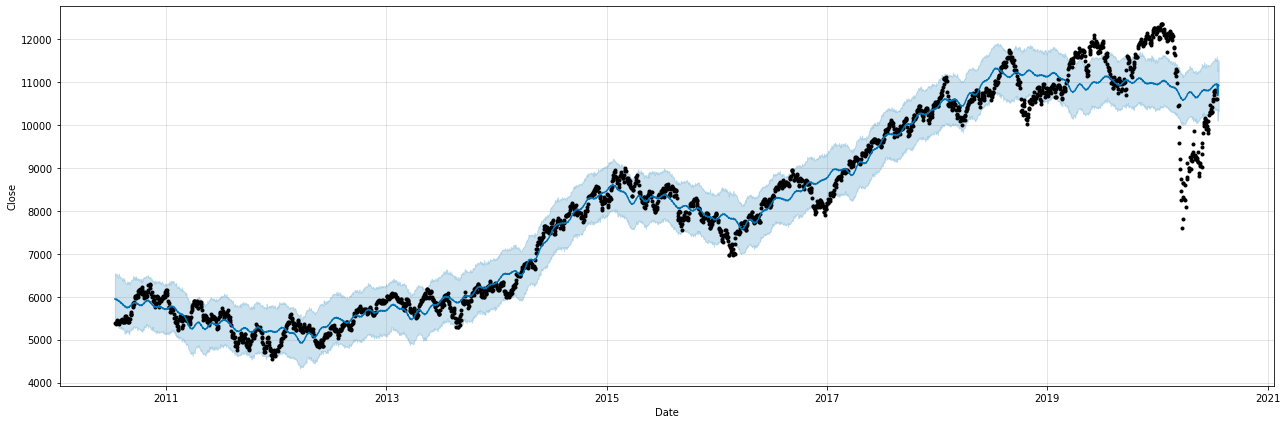

In [118]:
figure = m.plot(forecast, xlabel='Date', ylabel='Close', figsize=(18,6))

# BLACK DOT REPRESENTS THE ORIGNAL DATA
# BLACK DOT REPRESENTS THE PREDICTED DATA / TREND

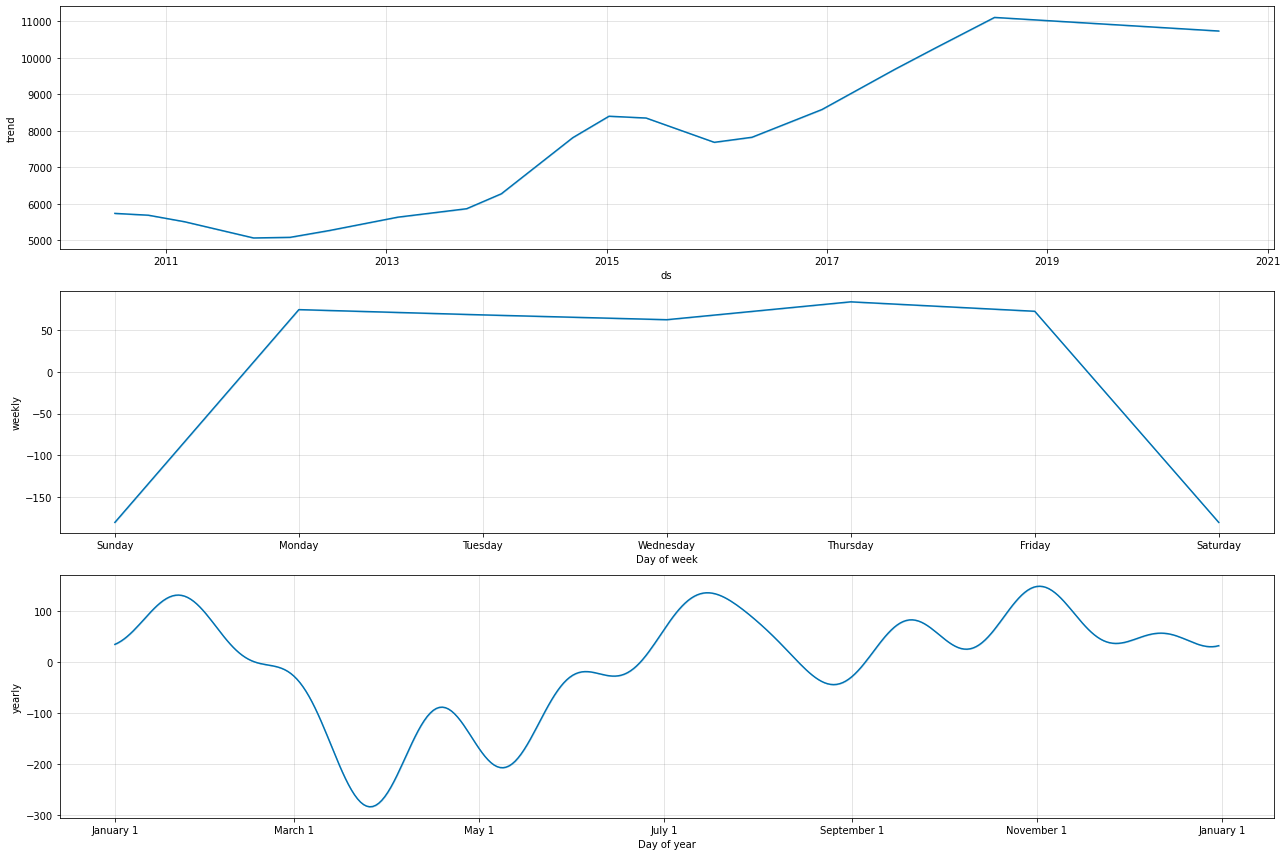

In [119]:
figure2 = m.plot_components(forecast, figsize=(18,12))

In [150]:
forc = forecast[['ds','yhat']]
forc = forc.rename(columns={'ds':'Date', 'yhat':'forecast_Close'})

In [151]:
forc.tail(12)    

,Date,forecast_Close
2440,2020-07-09,10950.096737
2441,2020-07-10,10942.566045
2442,2020-07-13,10951.194484
2443,2020-07-14,10945.573532
2444,2020-07-15,10939.799773
2445,2020-07-16,10960.445754
2446,2020-07-17,10947.785080
2447,2020-07-18,10693.268917
2448,2020-07-19,10690.768661
2449,2020-07-20,10942.317996


**FINAL FORECAST**